In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
# 计算并返回置换 perm 中最长循环的长度
# 遍历置换，使用 visited 数组避免重复
# longest>k 时可视为必败但此处仅统计长度

def _max_cycle_length(perm: np.ndarray) -> int:
    n = perm.size
    visited = np.zeros(n, dtype=bool)
    longest = 0
    for start in range(n):
        if not visited[start]:
            current = start
            length = 0
            while not visited[current]:
                visited[current] = True
                current = perm[current]
                length += 1
            longest = max(longest, length)
    return longest

In [3]:
# 循环策略模拟
# 对每次试验生成随机置换
# 成功判定：最长循环 ≤ k
# 返回成功率和每轮最长循环数组

def simulate_cycle_strategy(n: int = 100, k: int = 50, t: int = 10_000,
                            seed: int | None = None) -> Tuple[float, np.ndarray]:
    rng = np.random.default_rng(seed)
    max_cycles = np.empty(t, dtype=int)
    success = 0
    for i in range(t):
        perm = rng.permutation(n)
        m = _max_cycle_length(perm)
        max_cycles[i] = m
        if m <= k:
            success += 1
    return success / t, max_cycles

In [4]:
# 随机策略模拟
# 每名囚犯随机打开 k 个盒子，不放回
# 若全部囚犯找到编号则成功

def simulate_random_strategy(n: int = 100, k: int = 50, t: int = 10_000,
                             seed: int | None = None) -> float:
    rng = np.random.default_rng(seed)
    success = 0
    for _ in range(t):
        boxes = rng.permutation(n)
        for prisoner in range(n):
            if prisoner not in boxes[rng.choice(n, k, replace=False)]:
                break
        else:
            success += 1
    return success / t

In [5]:
# 绘制循环策略的最大循环长度分布直方图
def plot_cycle_distribution(max_cycles: np.ndarray, k: int, n: int) -> None:
    plt.figure(figsize=(8, 5))
    plt.hist(max_cycles, bins=range(1, max(max_cycles) + 2), edgecolor="white", align='left')
    plt.axvline(k + 0.5, linestyle="--", linewidth=1.5, label=f"k={k}")
    plt.title(f"Max-cycle Length Distribution (n={n})")
    plt.xlabel("max cycle length")
    plt.ylabel("frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
# 批量模拟不同 (N, K) 组合并绘制成功率折线图
# 预设若干有代表性的 (N, K) 对，例如 (50,25)、(100,50) 等
# 结果以表格形式打印，并同时绘制两种策略的成功率随 N 变化的曲线

def batch_simulation(pairs: list[tuple[int, int]], t: int = 10_000, seed: int | None = None) -> None:
    ns, rates_cycle, rates_rand = [], [], []
    print("\n批量模拟结果 (T =", t, ")")
    print("N\tK\tCycle%\tRandom%")
    for n, k in pairs:
        cycle_r, _ = simulate_cycle_strategy(n, k, t, seed)
        rand_r  = simulate_random_strategy(n, k, t, seed)
        ns.append(n)
        rates_cycle.append(cycle_r)
        rates_rand.append(rand_r)
        print(f"{n}\t{k}\t{cycle_r*100:.2f}\t{rand_r*100:.2f}")

    # 绘制成功率对比曲线
    plt.figure(figsize=(8, 5))
    plt.plot(ns, [r*100 for r in rates_cycle], '-o', label='Cycle strategy')
    plt.plot(ns, [r*100 for r in rates_rand], '-s', label='Random strategy')
    plt.title('Success rate vs N')
    plt.xlabel('N (prisoners / boxes)')
    plt.ylabel('Success rate (%)')
    plt.xticks(ns)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [7]:
# main 函数
def main() -> None:
    mode = input("是否运行预设批量模拟? (y/n): ").strip().lower()
    if mode == 'y':
        default_pairs = [(50, 25), (100, 50), (150, 75), (200, 100)]
        try:
            t = int(input("模拟轮次 T(默认10000)：") or 10_000)
            seed_txt = input("随机种子(可留空)：").strip()
            seed = int(seed_txt) if seed_txt else None
        except ValueError:
            print("输入错误，使用默认参数。")
            t, seed = 10_000, None
        batch_simulation(default_pairs, t, seed)
        return  # 结束

    # 单次模拟
    try:
        n = int(input("输入囚犯数量 N(默认100)：") or 100)
        k = int(input("每人尝试次数 K(默认50)：") or 50)
        t = int(input("模拟轮次 T(默认10000)：") or 10_000)
        seed_txt = input("随机种子(可留空)：").strip()
        seed = int(seed_txt) if seed_txt else None
    except ValueError:
        print("输入有误，使用默认值。")
        n, k, t, seed = 100, 50, 10_000, None

    print("模拟随机策略…", end="")
    rand_rate = simulate_random_strategy(n, k, t, seed)
    print(f" {rand_rate:.4%}")

    print("模拟循环策略…", end="")
    cycle_rate, max_cycles = simulate_cycle_strategy(n, k, t, seed)
    print(f" {cycle_rate:.4%}")

    if input("绘制分布图? (y/n): ").lower() == 'y':
        plot_cycle_distribution(max_cycles, k, n)


批量模拟结果 (T = 10000 )
N	K	Cycle%	Random%
50	25	31.75	0.00
100	50	31.19	0.00
150	75	31.12	0.00
200	100	31.27	0.00


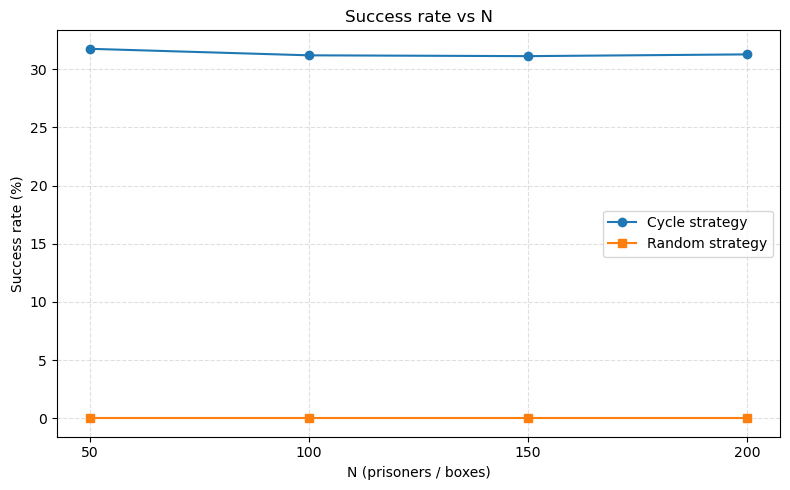

In [8]:

# 运行
if __name__ == "__main__":
    main()

模拟随机策略… 0.0000%
模拟循环策略… 30.6400%


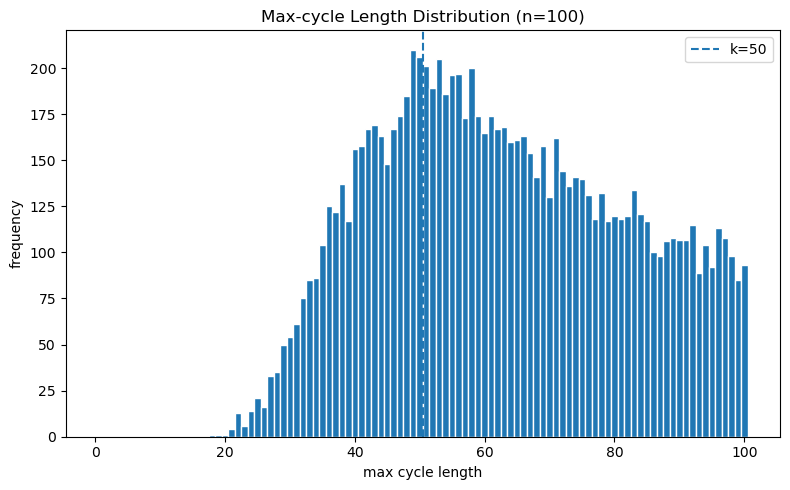

In [9]:

# 运行
if __name__ == "__main__":
    main()